In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Plot.BodeDiagram import bode_diagram
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

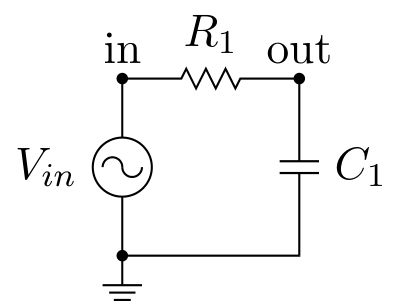

In [5]:
circuit = Circuit('Low-Pass RC Filter')

circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=1@u_V)
R1 = circuit.R(1, 'in', 'out', 1@u_kΩ)
C1 = circuit.C(1, 'out', circuit.gnd, 1@u_uF)
print(circuit)

2025-06-12 14:11:33,508 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
.title Low-Pass RC Filter
Vinput in 0 DC 0V AC 1V SIN(0V 1V 50Hz 0s 0Hz)
R1 in out 1kOhm
C1 out 0 1uF



In [3]:
break_frequency = 1 / (2 * math.pi * float(R1.resistance * C1.capacitance))
print("Break frequency = {:.1f} Hz".format(break_frequency))

Break frequency = 159.2 Hz


In [9]:
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=10,  variation='dec')